Fluid model of bike flows at a single station. Computes number of outages as a function of initial bikes and plots the resulting function



In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import math

# Constants
hrs_in_day = 18
station_capacity = 60 # Number of racks in station

# Biker arrivals and bike arrivals per hour for 18 hours of operations starting at 6am
# outgoing = number of people arriving to pick up a bike per hour
# incoming = number of people on bikes arriving to return a bike
# Example of mostly outflows in the morning
outgoing = np.array([4, 8, 10, 9, 7, 6, 5, 5, 4, 4, 4, 8, 12, 6, 3, 2, 2, 2])
incoming = np.array([2, 2, 3, 4, 6, 8, 6, 8, 12, 12, 16, 16, 14, 8, 8, 6, 4, 2])
net_inflow = incoming - outgoing

Generate plot of the arrival and service rates

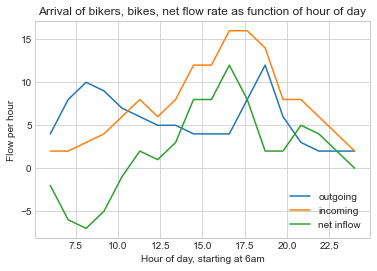

In [32]:
# Explore number of riders in system n ranging from 0 to twice the number of drivers
#fig = plt.figure()
#ax = plt.axes()
plt.figure()
plt.title("Arrival of bikers, bikes, net flow rate as function of hour of day")
plt.xlabel("Hour of day, starting at 6am")
plt.ylabel("Flow per hour")
x_nums= np.linspace(6, 6 + hrs_in_day, hrs_in_day)
plt.plot(x_nums, outgoing, label='outgoing')
plt.plot(x_nums, incoming, label='incoming')
plt.plot(x_nums, net_inflow, label='net inflow')
plt.legend(loc='lower right')
plt.show()


Compute outages as a function of initial bikes

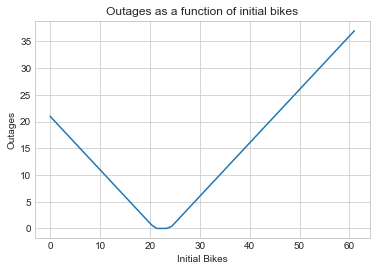

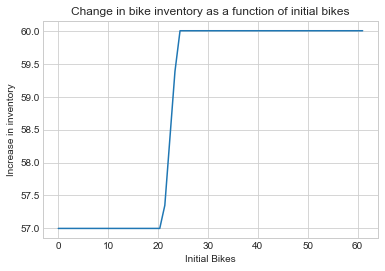

In [35]:
initial_bikes = np.linspace(0, station_capacity+1, station_capacity+1) # initial bikes can be 0, 1, ..., capacity
outages = np.zeros(station_capacity+1) # Contains number of outages as a function of the initial bikes

current_bikes = np.copy(initial_bikes)
for i in range(hrs_in_day):
    outages += np.maximum(0, current_bikes + net_inflow[i] - station_capacity) # Outages when exceed capacity
    outages += np.maximum(0, -(current_bikes + net_inflow[i])) # Outages when drop below zero
    current_bikes += net_inflow[i]
    current_bikes = np.maximum(current_bikes, 0) # Now pin the inventory to be >= 0, <= station capacity
    current_bikes = np.minimum(current_bikes, station_capacity)

#plot the outages
plt.plot(initial_bikes, outages)
plt.title("Outages as a function of initial bikes")
plt.xlabel("Initial Bikes")
plt.ylabel("Outages")
plt.show()

#plot the change in bike inventory
plt.plot(initial_bikes, current_bikes)
plt.title("End-of-day bike inventory as a function of initial bikes")
plt.xlabel("Initial Bikes")
plt.ylabel("Number of bikes")
plt.show()



In this example, the number of initial bikes that minimize outages is around 23, where no outages result. However, with that many bikes at the start of the day, the number of bikes in the racks increases by more than 35 to 58 or more overnight. So this solution cannot be sustained over multiple days without moving many bikes each night. 
